<a href="https://colab.research.google.com/github/boramkim0514/KOIPA_AI/blob/main/D43_CNN%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST 데이터 준비 및 시각화

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets

import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# 이미지 시각화 및 형상(shape)확인 

In [ ]:
image = X_train[0]
image.shape

(28, 28)

In [ ]:
image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

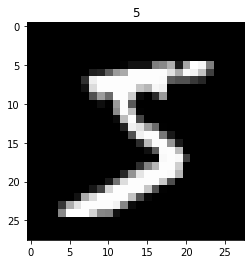

In [ ]:
plt.imshow(image, 'gray')
plt.title(y_train[0])
plt.show()

## CNN 레이어 삽입하기 위한 배열 편집
* 4차원 형태의 데이터를 유지해야 한다
* `(N, H, W, C)` -> `(배치크기, 높이, 가로, 채널수)`
* MNIST 손글씨 이미지 : 높이 - 28px, 가로 -28px, 채널 -1ch
* 1장의 이미지 - `(28, 28)`-> `(1, 28, 28, 1)로 바꿔주어야 함

In [ ]:
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

# Conv 레이어 사용
keras의 대표적 CNN 레이어 두가지
1. Conv2D
* `stride`가 2방향으로 움직인다.(가로, 세로)
* 이미지 분석을 위해 사용되는 일반적인 합성곱 레이어

2. Conv1D
*` stride`가 방향으로 움직인다(세료)
* `텍스트 분석을 위해 사용되는 레이어 ( `char CNN` )


# Conv2D 매개변수 확인(외우기!)
* `filters` : 필터 개수($C_{out}$)
* `kernel_size` : 필터의 크기( $K_H$, $K_W$)
* `strides` : 몇 개의 픽셀을 스킵하면서 필터가 훑게 할지 결정 ( 스트라이드가 커지면 출력 특징맵의 크기가 줄어 든다)
* `padding`: 0으로 쌓여진 패딩을 만들 것인지에 대한 설정
  * `VALID` : 패딩을 만들지 않는다.
  * `SAME`  : 한개 짜리 패딩 생성 - 이미지 주변을 한줄로 감싸기
* `activation`: 활성화 함수 지정하기. 따로 지정하지 않고 추후에 레이어로 추가 가능



In [ ]:
# from tensorflow.keras.layers import Conv2D
# Conv2D
tf.keras.layers.Conv2D(
    filters = 3, #필터 개수
    kernel_size = (3, 3), #필터 (세로, 가로) 크기 1 x 1 , 3 x 3, 5 x 5, 7 x 7 주로 사용 
    strides = (1, 1), #가로, 세로로 움직이는 방향
    padding='SAME', #패딩 여부( SAME - 패딩적용, VALID - 패딩 미적용)
    activation='relu'
)

In [ ]:
# 필터의 세로 가로 크기 및 스트라이드의 세로 가로를 똑같이 하려면 굳이 튜플을 쓸 필욘 없다
tf.keras.layers.Conv2D(
    filters=3,
    kernel_size=3, # 3 x 3 필터
    strides=1, # 1 x 1 stride
    padding='SAME',
    activation='relu'
)

In [ ]:
image = tf.cast(image, dtype=tf.float32)
image.dtype

tf.float32

In [ ]:
layer = tf.keras.layers.Conv2D(filters=5, kernel_size=3, strides=1, padding='SAME') 
output = layer(image) # image #conv1 연산 이후 Hw, Cout필터 갯수만큼 아웃풋이 나오니까 5채널) 레이어의 하이퍼 파라미터 shape 보고 먼저 계산해보기, 내가 구축한 모델이 어떤식으로 돌아갈지 머리로 그려짐 
output.shape

TensorShape([1, 28, 28, 5])

출력 특징 맵이 5개 !

In [ ]:
# 출력 특징 맵을 시각화 해보기
# 제일 앞 원본, 뒤에 특징맵 5개

In [ ]:
# plt.imshow(layer)

# plt.subplot(6, 1, 1) 
# plt.plot(layer)


# plt.show()

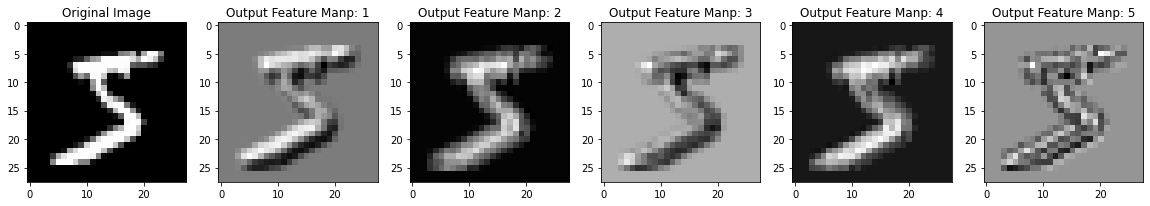

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))
axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title("Original Image")

for idx, ax in enumerate(axes[1:]):
    ax.set_title("Output Feature Manp: {}".format(idx + 1))
    ax.imshow(output[0, ..., idx], cmap='gray')

plt.show()

## Filter 시각화 하기
* CNN에서 Filter의 역할은 실제 CNN레이어가 이미지의 무엇을 보고 있는가를 이야기
* keras의 레이어들은 layer.get_wetights() 함수를 이용해 편향, 가중치 등 볼수 있음

In [ ]:
# Conv2D 레이어의 필터 모양: (3, 3, 1, 5) - ( 필터 세로, 필터 가로 , 입력 특징 맵 채널 개수, 출력 특징 맵의 채널 개수)
weights = layer.get_weights()

In [ ]:
print("가중치(필터)의 형상 : {}".format(weights[0].shape))
print("편향의 형상: {}".format(weights[1].shape))

가중치(필터)의 형상 : (3, 3, 1, 5)
편향의 형상: (5,)


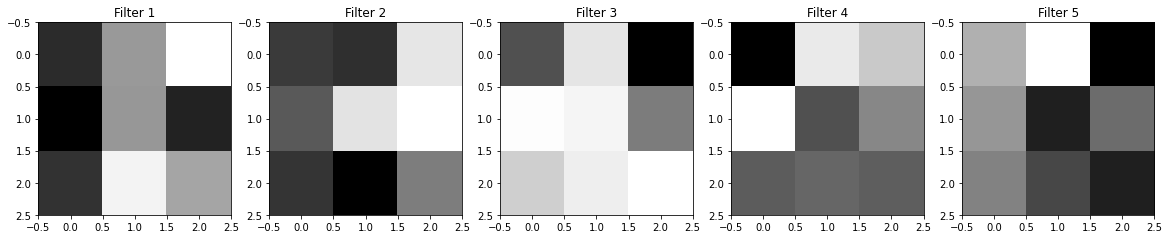

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))

for idx, ax in enumerate(axes):
    ax.set_title("Filter {}".format(idx+1))
    ax.imshow(weights[0][..., 0, idx], cmap='gray')

plt.show()

# ReLU 레이어 사용
* 이미지 분석에서 ReLU가 자주 사용됨
* 이미지 데이터에서 음수 데이터는 필요가 없는 데이터이다.
  * 필요 없는 음수 데이터는 제거하고, 의미 있는 양수 데이터만 강조하기 위해서 `ReLU`가 일반적으로 사용된다.

In [ ]:
import numpy as np
np.min(output), np.max(output)

(-201.89801, 294.77368)

In [ ]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output) #합성곱의 결과가 활성화 레이어로 들어간다
act_output.shape

TensorShape([1, 28, 28, 5])

#ReLU 시각화

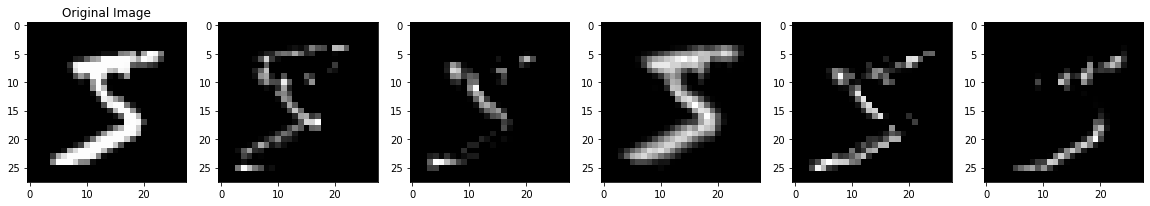

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))

axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title("Original Image")

for idx, ax in enumerate(axes[1:]):
    #ax.set_title()
    ax.imshow(act_output[0, ..., idx], cmap='gray')

# MaxPooling 레이어 사용
`Pooling`과정을 통해 이미지 축소 및 정보의 종합을 구현할 수 있다.

In [ ]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')
pool_output = pool_layer(act_output)

pool_output.shape

TensorShape([1, 14, 14, 5])

# MaxPooling 시각화

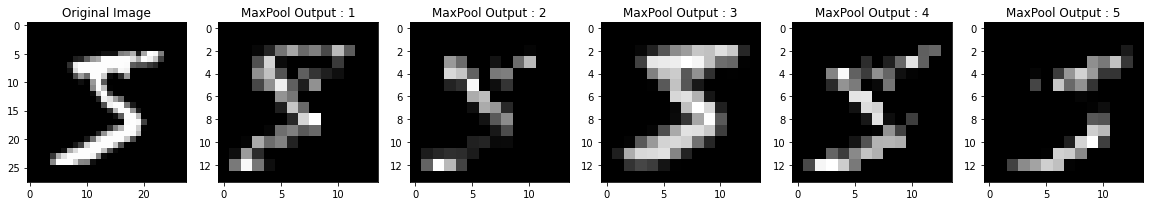

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))

axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title("Original Image")

for idx, ax in enumerate(axes[1:]):
    ax.set_title("MaxPool Output : {}".format(idx+1))
    ax.imshow(pool_output[0, ..., idx], cmap='gray')

plt.show()

**여기까지의 과정을 특징 추출 과정(Feature Extrac)**
* MaxPool2D 까지는 특징 추출 과정
  * 예측을 하기 위한 과정이 아닌, 데이터 (이미지)에 대한 특징만 추출
* 예측을 수행하기 위해서는 `Fully Connected`(전결합) 과정이 필요하다.
  * `Dense` 레이어를 사용한다.
* `Fully Connected Layer`를 사용하기 위해서는 데이터가 **평탄화**되어 있어야 한다.

In [ ]:
flatten_layer = tf.keras.layers.Flatten()
flatten_output = flatten_layer(pool_output)

# Dense 레이어 확인
* 계산 과정 $WX+b$을 하기 위한 `Dense`레이어. `Fully Connected Layer` 라고도 한다.



In [ ]:
# 유닛이 32개인 Dense Layer 만들기
dense_layer = tf.keras.layers.Dense(32, activation='relu')
dense_output = dense_layer(flatten_output)

dense_output.shape

TensorShape([1, 32])

In [ ]:
# 출력층 설계
# 숫자는 10종류니까 출력층의 뉴련 개수도 10개
dense_layer2 = tf.keras.layers.Dense(10, activation='relu')
dense_output2 = dense_layer2(dense_output)

dense_output2.shape

TensorShape([1, 10])

In [ ]:
#sequential data

Sequential Model로 Mnist 분류기 만들기

In [ ]:
# model = Sequential([
#   Flatten(input_shape=(28, 28)),
#   Dense(512, activation='relu'),
#   Dense(256, activation='relu'),
#   Dense(128, activation='relu'),
#   Dense(64, activation='relu'),
#   Dense(32, activation='relu'),
#   Dense(10, activation='softmax'),
# ])

# model.summary()

In [ ]:
# 레이어 불러오기
from tensorflow.keras.layers import Conv2D, ReLu, Maxpool2D, Flatten, Dense, Input
from tensorflow.keras.models import Sequential

In [ ]:
input.shape()

In [ ]:
# # input layer
# model = Sequential([layers=
#     Input(shape=(28, 28, 1)), #배치는 고려하지 않고, 채널 데이터가지만만 추가
#     Conv2D(filter=32, kernel_size=3, padding='SAME'),
#     activation='relu'),
#     Conv2D(filter=32, kernel_size=3, padding='SAME'),
#     activation='relu'),

#     Conv2D(filter=32, kernel_size=3, padding='SAME'), 
#     activation='relu'),
#     Conv2D(_ , activation='relu'),

# )]

# model.summary()            
                    
                    
#                     ])
# input = Input(shape=(3, 3, 32)),
 
# model.summary()
# # sequential model 만들기                  
    
# # 2번째 Conv layer + Relu

# # Maxpooling Layer
# # 3번째 Conv layer + Relu
# # 4번째 Conv layer + max pooling

# # Flatten layer
# # Dense
# # ReLu

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, ReLU, MaxPool2D, Flatten, Dense, Input

model = Sequential([
  Input(shape=(28, 28, 1)),
  Conv2D(filters=32, kernel_size=3, padding='SAME'),
  ReLU(),
  Conv2D(filters=32, kernel_size=3, padding='SAME'),
  ReLU(),
  MaxPool2D(pool_size=(2, 2)),

  Conv2D(filters=64, kernel_size=3, padding='SAME', activation='relu'),
  Conv2D(filters=64, kernel_size=3, padding='SAME', activation='relu'),
  MaxPool2D(pool_size=(2, 2)),

  Flatten(),

  Dense(512, activation='relu'),
  Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
re_lu (ReLU)                 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        3

In [ ]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
# 차원 추가
X_train = X_train[..., tf.newaxis]
X_test  = X_test[..., tf.newaxis]

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
model.fit(X_train,
          y_train,
          validation_split=0.2,
          epochs=10,
          batch_size=32,
          shuffle=True)

Epoch 1/10
1500/1500 [==============================] - 37s 4ms/step - loss: 0.1124 - acc: 0.9650 - val_loss: 0.0452 - val_acc: 0.9860
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0379 - acc: 0.9879 - val_loss: 0.0375 - val_acc: 0.9899
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0254 - acc: 0.9916 - val_loss: 0.0337 - val_acc: 0.9899
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0192 - acc: 0.9939 - val_loss: 0.0414 - val_acc: 0.9886
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0153 - acc: 0.9951 - val_loss: 0.0308 - val_acc: 0.9919
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0122 - acc: 0.9962 - val_loss: 0.0346 - val_acc: 0.9909
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0116 - acc: 0.9964 - val_loss: 0.0298 - val_acc: 0.9922
Epoch 8/10
1500/1500 [==============================] - 6s 4m